<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module2/M2_1/b_GraphicalMethod_Minimize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Graphical Method (Minimize Objective Function)


**OPIM 5641: Business Decision Modeling - University of Connecticut**

--------------------------------------

The graphical method works only when there are two decision variables, but it provides valuable insight into how larger problems are solved. 

In this example, we will show (graphically) how we can minimize the objective function. You'll note how the feasible area changes - but that our corner point property will help us evaluate the extreme locations where we expect to to have the optimal values.

Take out a piece of paper and draw this while it is explained to you. Then try to replicate in Python (looking at the code on your second monitor, and then without looking!) If you can do this, you really know it - otherwise you're just going through the motions.

---------------------------------------------------------------------------
**Holiday Meal Turkey Range** (from Chapter 2, Nagraj et. al)
The Holiday Meal Turkey Ranch is planning to use two different brands of turkey feed—brand A and brand B—to provide a good diet for its turkeys. Each feed contains different quantities (in units) of the three nutrients (protein, vitamin, and iron) essential for fattening turkeys. Table 1 summarizes this information and also shows the minimum unit of each nutrient required per month by a turkey. 

Nutrient | Brand A Feed | Brand B Feed| Min Req'd per Turkey
--- | --- | ---| ---
Protein (units) | 5 | 10 | 45.0
Vitamins (units) | 4 | 3 | 24.0
Iron (units) | 0.5 | 0 | 1.5
Cost per pound| 0.10 USD | 0.15 USD | --

Brand A feed costs 0.10 USD per pound, and brand B feed costs 0.15 USD per pound. The owner of the ranch would like to use LP to determine the quantity of each feed to use in a turkey’s diet in order to meet the minimum monthly requirements for each nutrient at the lowest cost. 

If we let  $A$  denote the number of pounds of brand A feed to use per turkey each month and $B$ denote the number of pounds of brand B feed to use per turkey each month, we can proceed to formulate this LP problem as follows:       

To provide a structured approach for formulating this problem (and any other LP problem, irrespective of size and complexity), we present a three-step process in the following sections - decision variables, objective function and constraints.

**Note:** sometimes all the data you need can come from a table - other times you will need to decipher a word problem for all of the relevant information.

### Decision Variables
Brand A (A) and Brand B (B) that need to be purchased.

Decision variables  (or choice variables) represent the unknown entities in a problem—that is, what we are solving for in the problem. For example, in the Turkey Ranch problem, there are two unknown entities: the number of pounds of Brand A food and Brand B food. Note that all other unknowns in the problem (e.g., the protein requirement, the vitamin requirement) can be expressed as linear functions of the number of pounds of A and B.

### Objective Function
 The objective function states the goal of a problem—that is, why we are trying to solve the problem. An LP model must have a single objective function. In most business-oriented LP models, the objective is to either maximize profit or minimize cost. 
 
 The goal in this step is to express the profit (or cost) in terms of the *decision variables* defined earlier.

$Min(Z) = 0.10A + 0.15B$

We need to feed our turkeys for the lowest possible cost!

### Constraints
subject to:
* $5A + 10B >= 45$ `(protein required)`
* $4A + 3B >= 24$ `(vitamins required)`
* $0.5A >= 1.5$ `(iron required)`
* $A,B >= 0$ `(nonnegativity)`

## Import Modules

In [ ]:
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

     |████████████████████████████████| 9.1 MB 12.0 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 148489 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to un

# Plotting the Constraints on the Graph
To plot the constraints, we take each equation and we set one variable to 0 and see how the inequality updates.

For ease, we bring down our constraints one more time and plot them.

We assume A will be on the X axis, and B will be on the Y axis.

### Constraints
* $5A + 10B >= 45$ `(protein required)`
  * if A = 0, then B = 45/10 = 4.5
    * (A = 0, B = 4.5)
  * if B = 0, then A = 45/5 = 9
    * (A = 9, B = 0)
* $4A + 3B >= 24$ `(vitamins required)`
  * if A = 0, then B = 24/3 = 8
    * (A = 0, B = 8)
  * if B = 0, then A = 24/4 = 6
      * (A = 6, B = 0)
* $0.5A >= 1.5$ `(iron required)`
  * we know A is the X axis, so this must be a vertical line
  * A = 1.5 / 5 = 3
    * A = 3
* $A,B >= 0$ `(nonnegativity)`
  * We always will be in the X1, Y1 plane - all decision variables must be positive numbers! 


Text(4, 6, 'FEASIBLE REGION IS UNBOUNDED!')

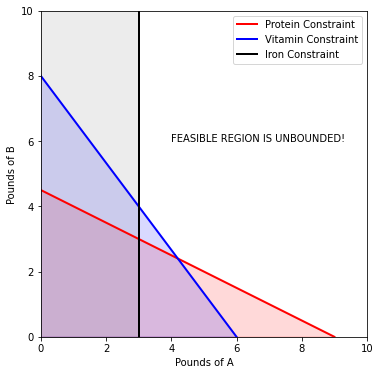

In [ ]:
# this is the example from Pyomo cookbook
# pylab makes it easy to make plots

figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,10,0,10])
xlabel('Pounds of A')
ylabel('Pounds of B')

# Protein Constraint
# can you see the two points (0, 4.5) and (9, 0) in the code below?
# remember, A is X and B is Y 
x = array([0,   9])
y = array([4.5, 0]) 
plot(x,y,'r',lw=2)
# since this is a minimization problem we shade towards the origin!
# again, notice how the points line up!
fill_between([0,9,0], # x area
             [4.5, 0, 0], # y area
             [0,0,0], # bottom area, shade in everything below!
             color='red', # color 
             alpha=0.15) # transparency

# # Vitamin Constraint
x = array([0, 6])
y = array([8, 0]) 
plot(x,y,'blue',lw=2)
fill_between([0, 6, 0], # x area
             [8,0,0], # y area
             [0,0,0], # bottom area - all 0s! Easy.
             color='blue', # color 
             alpha=0.15) # transparency

# Iron constraint
# Iron is only in A! 
# the points are where it intersects the X axis (A = 3, B = 0)
# and the other point goes to infinity (we set to plot limits) (A = 3, B = 10)
# then draw a line between the two points
plot([3, 3],[0,10],'black',lw=2)
fill_between([0,3], # A values (X)
             [10, 10], # B values (Y)
             [0,0], # shade to left to the origin!
             color='grey',alpha=0.15)

legend(['Protein Constraint','Vitamin Constraint','Iron Constraint'])

# the area in white is the feasible region!
text(4,6,'FEASIBLE REGION IS UNBOUNDED!')

# but the farther away from the origin you go, the more money you'll spend
# which is really bad for a minimization problem!

# The Feasible Region
The feasible region is the area we find all valid/possible solutions. These possible solutions will satisfy our constraints, but at a cost! But not all solutions are equally good - for example we see that the point (A=6, B=4)is in the feasible region. We can plug and chug and see that the objective function would become:

$Z = 0.10A + 0.15B$

$Z = 0.10*6 + 0.15*4$

$Z = 1.20$

We can plot the point on the graph for ease of viewing.

Text(6, 4, '(6, 4)')

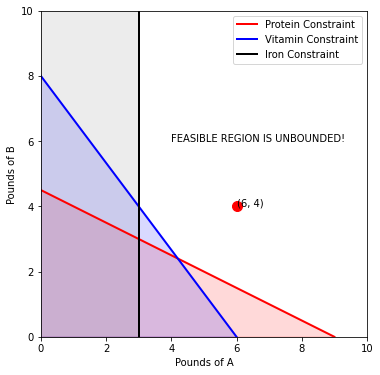

In [ ]:
figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,10,0,10])
xlabel('Pounds of A')
ylabel('Pounds of B')

# Protein Constraint
# can you see the two points (0, 4.5) and (9, 0) in the code below?
# remember, A is X and B is Y 
x = array([0,   9])
y = array([4.5, 0]) 
plot(x,y,'r',lw=2)
# since this is a minimization problem we shade towards the origin!
# again, notice how the points line up!
fill_between([0,9,0], # x area
             [4.5, 0, 0], # y area
             [0,0,0], # bottom area, shade in everything below!
             color='red', # color 
             alpha=0.15) # transparency

# # Vitamin Constraint
x = array([0, 6])
y = array([8, 0]) 
plot(x,y,'blue',lw=2)
fill_between([0, 6, 0], # x area
             [8,0,0], # y area
             [0,0,0], # bottom area - all 0s! Easy.
             color='blue', # color 
             alpha=0.15) # transparency

# Iron constraint
# Iron is only in A! 
# the points are where it intersects the X axis (A = 3, B = 0)
# and the other point goes to infinity (we set to plot limits) (A = 3, B = 10)
# then draw a line between the two points
plot([3, 3],[0,10],'black',lw=2)
fill_between([0,3], # A values (X)
             [10, 10], # B values (Y)
             [0,0], # shade to left to the origin!
             color='grey',alpha=0.15)

legend(['Protein Constraint','Vitamin Constraint','Iron Constraint'])

# the area in white is the feasible region!
text(4,6,'FEASIBLE REGION IS UNBOUNDED!')

# add our sample point to evaluate (6, 4)
plot(6,4,'r.',ms=20) # makes a red dot on the plot
annotate('(6, 4)', xy=(6,4), xytext=(6,4)) # adds a label for '(6,4)'

Try another one! How about (A = 5, B = 3)?

$Z = 0.10A + 0.15B$

$Z = 0.10*5 + 0.15*3$

$Z = 0.85$

A little better! We can also plot for ease of viewing.

Note that as we get closer to the origin and corner points, we find the optimal solution!

Text(5, 3, '(5, 3)')

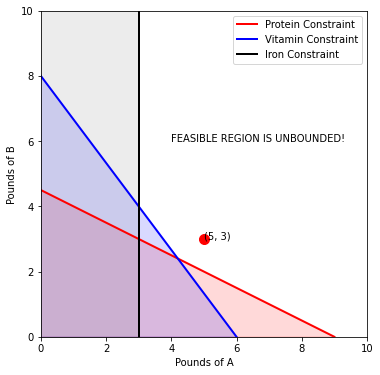

In [ ]:
figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,10,0,10])
xlabel('Pounds of A')
ylabel('Pounds of B')

# Protein Constraint
# can you see the two points (0, 4.5) and (9, 0) in the code below?
# remember, A is X and B is Y 
x = array([0,   9])
y = array([4.5, 0]) 
plot(x,y,'r',lw=2)
# since this is a minimization problem we shade towards the origin!
# again, notice how the points line up!
fill_between([0,9,0], # x area
             [4.5, 0, 0], # y area
             [0,0,0], # bottom area, shade in everything below!
             color='red', # color 
             alpha=0.15) # transparency

# # Vitamin Constraint
x = array([0, 6])
y = array([8, 0]) 
plot(x,y,'blue',lw=2)
fill_between([0, 6, 0], # x area
             [8,0,0], # y area
             [0,0,0], # bottom area - all 0s! Easy.
             color='blue', # color 
             alpha=0.15) # transparency

# Iron constraint
# Iron is only in A! 
# the points are where it intersects the X axis (A = 3, B = 0)
# and the other point goes to infinity (we set to plot limits) (A = 3, B = 10)
# then draw a line between the two points
plot([3, 3],[0,10],'black',lw=2)
fill_between([0,3], # A values (X)
             [10, 10], # B values (Y)
             [0,0], # shade to left to the origin!
             color='grey',alpha=0.15)

legend(['Protein Constraint','Vitamin Constraint','Iron Constraint'])

# the area in white is the feasible region!
text(4,6,'FEASIBLE REGION IS UNBOUNDED!')

# add our sample point to evaluate (5, 3)
plot(5,3,'r.',ms=20) # makes a red dot on the plot
annotate('(5, 3)', xy=(5,3), xytext=(5,3)) # adds a label for '(5, 3)'

# Find Corner Points and Plot Them

So - the feasible region has a bunch of possible values for A and B that satisfy our constraints but we don't want to spend all of our money... but is there a way we can identify a subset of solutions to evaluate rather than iterating over ALL possible points?

The  corner point property: this property states that an optimal solution to an LP problem will always occur at a corner point of the feasible region - regardless of whether it's a maximization or minimization LP problem. Corner points are the extreme points of the possible solutions - it's where the constraints cross paths.

To solve for corner points, we solve for the intersection of the two constraints equations. This is done by subtracting the equations from each other.

The naming of the points is arbitrary - but we'll go from left to right.

* **Point 1** (A = 3, B = 4)
  * where the Vitamin constraint (blue line) and Iron constraint (black line) intersect
  * first, turn the inequalities into equal signs.

  $4A + 3B = 24$ `(vitamins required)`

  $0.5A = 1.5$ `(iron required)`
  * if we multiply the bottom equation by 8, we can then subtract the equations and get rid of A.

  $4A + 3B - 4A = 24 - 8*1.5$

  $3B = 24 - 12$

  $B = 12/3$

  $B = 4$

  * if we plug this back into the first equation, we get A. 

  $4A + 3*4 = 24$

  $A = 3$

* **Point 2** (A = 4.2, B = 2.4)
  * this is where Protein constraint (red line) intersects the Vitamin constraint (blue line)
  * we need to subtract these two equations and get rid of a variable, then plug it back in to calculate the other variable.
  * first, turn the inequalities into equal signs. 

  $5A + 10B >= 45$ `(protein required)`

  $4A + 3B = 24$ `(vitamins required)`

  * now we need to subtract these two equations and cancel out one variables. We can multiply the top equation by 4 and the bottom equation by 5.

  $20A + 40B = 180$

  $20A + 15B = 120$

  * now let's get rid of the A's and solve for B.

  $20A + 40B - 20A - 15B = 180 - 120$

  $40B - 15B = 60$

  $25B = 60$

  $B = 2.4$

  * you can now plug this into the first equation and solve for A. 

  $5A + 10*2.4 = 45$

  $5A = 45-24$

  $A = 4.2$

* **Point 3** (A = 9, B = 0)
  * one more point to go!
  * this is where the Protein Constraint (red line) intersects the A axis (X). 
  * we already know where this happens from before when we drew the constraints crossing the X and Y axes - it's (A = 9, B = 0).

The same script above is pulled down here for ease of viewing, but now includes our corner points.

**Point 1** (A = 3, B = 4)
**Point 2** (A = 4.2, B = 2.4)
**Point 3** (A = 9, B = 0)



Text(9, 0, '3')

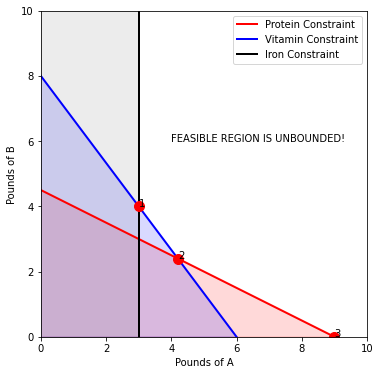

In [ ]:
figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,10,0,10])
xlabel('Pounds of A')
ylabel('Pounds of B')

# Protein Constraint
# can you see the two points (0, 4.5) and (9, 0) in the code below?
# remember, A is X and B is Y 
x = array([0,   9])
y = array([4.5, 0]) 
plot(x,y,'r',lw=2)
# since this is a minimization problem we shade towards the origin!
# again, notice how the points line up!
fill_between([0,9,0], # x area
             [4.5, 0, 0], # y area
             [0,0,0], # bottom area, shade in everything below!
             color='red', # color 
             alpha=0.15) # transparency

# # Vitamin Constraint
x = array([0, 6])
y = array([8, 0]) 
plot(x,y,'blue',lw=2)
fill_between([0, 6, 0], # x area
             [8,0,0], # y area
             [0,0,0], # bottom area - all 0s! Easy.
             color='blue', # color 
             alpha=0.15) # transparency

# Iron constraint
# Iron is only in A! 
# the points are where it intersects the X axis (A = 3, B = 0)
# and the other point goes to infinity (we set to plot limits) (A = 3, B = 10)
# then draw a line between the two points
plot([3, 3],[0,10],'black',lw=2)
fill_between([0,3], # A values (X)
             [10, 10], # B values (Y)
             [0,0], # shade to left to the origin!
             color='grey',alpha=0.15)

legend(['Protein Constraint','Vitamin Constraint','Iron Constraint'])

# the area in white is the feasible region!
text(4,6,'FEASIBLE REGION IS UNBOUNDED!')

# point 1
plot(3,4,'r.',ms=20) # makes a red dot on the plot
annotate('1', xy=(3,4), xytext=(3,4)) # adds a label for '1'

# point 2
plot(4.2, 2.4,'r.',ms=20) # makes a red dot on the plot
annotate('2', xy=(4.2, 2.4), xytext=(4.2, 2.4)) # adds a label for '2'

# point 3
plot(9,0,'r.',ms=20) # makes a red dot on the plot
annotate('3', xy=(9,0), xytext=(9,0)) # adds a label for '3'

Notice that the graph will always help you confirm you've found the corner points - and graphing with Python ensures that you don't have to worry about the shading or lining up the points just right.

# Evaluation of Corner Points
For each corner point we have, we need to evaluate how the values of A and B will influence cost. We seek to minimize cost.

$Min(Z) = 0.10A + 0.15B$

* Point 1: (A = 3, B = 4)
  * $Cost = 0.1*3 + 0.15*4 = 0.9\ USD$
* Point 2: (A = 4.2, B = 2.4)
  * $Cost = 0.1*4.2 + 0.15*2.4 = 0.78\ USD$ **[optimal!]**
* Point 3: (A = 9, B = 0)
  * $Cost = 0.1*9 + 0.15*0 = 0.9\ USD$

So there you have it, you need to spend 0.78 USD (or 78 cents) per turkey assuming you could buy fractions of bags of feed for each turkey.

If you had to feed 5000 turkeys, it would cost you $0.78*5000 = 3900\ USD$ and you would need $5000*4.2 = 21,000$ pounds of $A$ and $5000*2.4 = 12,000$ pounds of $B$.